# Setup

In [ ]:
!pip install gdown
!pip install imbalanced-learn
!gdown https://drive.google.com/drive/folders/1tTYmeHspNsESUe5-qOBjwLeodyVSxPb9?usp=sharing -O /tmp/ --folder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Retrieving folder list
Processing file 11lcXmCAhzu89eClIIlD2P42ehuLoDSKP complaints_processed.csv
Processing file 1z_K5OcQsPdediNK_ikli3ea1sjMHvpzo final-dataset-v2.csv
Processing file 1HyF-lkrRwRleSkoxtmBkIXRudgXz1W-i final-dataset.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11lcXmCAhzu89eClIIlD2P42ehuLoDSKP
To: /tmp/Sistemas de Apoia a Decisão/complaints_processed.csv
100% 99.5M/99.5M [00:00<00:00, 235MB/s]
Downloading...
From: https://drive.google.com/uc?id=1z_K5OcQsPdediNK_ikli3ea1sjMHvpzo
To: /tmp/Sistemas de Apoia a Decisão/final-dataset-v2.csv
100% 97.1M/97.1M [00:00<00:00, 226MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HyF-lkrRwRleSkoxtmBkIXRudgXz1W-i
To: /t

In [ ]:
import pandas as pd

dataset = pd.read_csv('/tmp/Sistemas de Apoia a Decisão/final-dataset-v2.csv')
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,narrative_transformed,y_target_label
0,purchase order day shipping amount receive pro...,0
1,forwarded message date tue subject please inve...,0
2,forwarded message cc sent friday pdt subject f...,1
3,payment history missing credit report speciali...,2
4,payment history missing credit report made mis...,2


# Trainning

### Train-Test split

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer, CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier

narrative = dataset['narrative_transformed']
y_targets = dataset['y_target_label']

X_train, X_test, y_train, y_test = train_test_split(narrative, y_targets, test_size=0.2, stratify=dataset['y_target_label'])

### Text embedding (Vectorization)

In [ ]:
vectorizer = HashingVectorizer(n_features=100)
vectorizer.fit(X_train, y_train)

HashingVectorizer(n_features=10000)

In [ ]:
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

### Balancing the dataset (Undersampling)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, KMeansSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, ClusterCentroids
from imblearn.combine import SMOTEENN
from collections import Counter

Counter(y_train)

Counter({2: 72937, 3: 15192, 4: 18518, 0: 12453, 1: 10828})

In [ ]:
ROS = RandomUnderSampler(sampling_strategy='auto')
X_train_ros, y_train_ros = ROS.fit_resample(X_train_vect, y_train)
Counter(y_train_ros)

Counter({0: 10828, 1: 10828, 2: 10828, 3: 10828, 4: 10828})

### Scale the data and train

In [ ]:
model = make_pipeline(StandardScaler(with_mean=False), LogisticRegression())
model.fit(X_train_ros, y_train_ros)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('logisticregression', LogisticRegression())])

# Model Results

In [ ]:
y_predicted = model.predict(X_test_vect)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_predicted)

0.7261028845857833

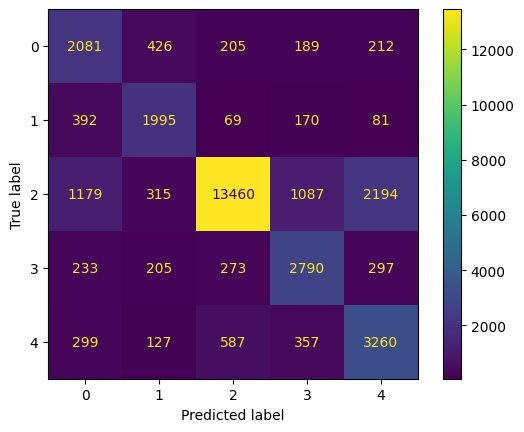

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)

plt.show()